In [165]:
# importing all needed libraries..
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [166]:
# read csv file using pandas and convert in into dataframe
df = pd.read_csv('./CSV_Files/processed-data.csv')
print("Shape-> ",df.shape)
df.head(10)

Shape->  (316800, 19)


,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
2,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
4,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
5,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
6,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0
7,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0
8,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0
9,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,0,1


In [167]:
Non_dupDF = df.drop_duplicates()
Non_dupDF

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
6,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0
9,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,0,1
24,1,1,1,1,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31665,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
31668,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0
31671,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0
31674,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [168]:
# Non_dupDF.columns
X = Non_dupDF.drop(['Severity_None','Severity_Mild','Severity_Moderate','Gender_Male',],axis=1)
y = Non_dupDF['Severity_None']
print(X.shape, y.shape)

(5760, 15) (5760,)


In [169]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test =train_test_split(X,y,test_size=0.2)
print(X_train.shape, X_test.shape)
X_train.shape[0]+ X_test.shape[0]

(4608, 15) (1152, 15)


5760

In [170]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [171]:
model.fit(X_train,y_train)
print("Acc -> ",model.score(X_test,y_test)*100,"%") # acc -> 77.08333333333334

Acc ->  77.08333333333334 %


[[888   0]
 [264   0]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       888
           1       0.00      0.00      0.00       264

    accuracy                           0.77      1152
   macro avg       0.39      0.50      0.44      1152
weighted avg       0.59      0.77      0.67      1152



C:\Users\babun\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\babun\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\babun\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

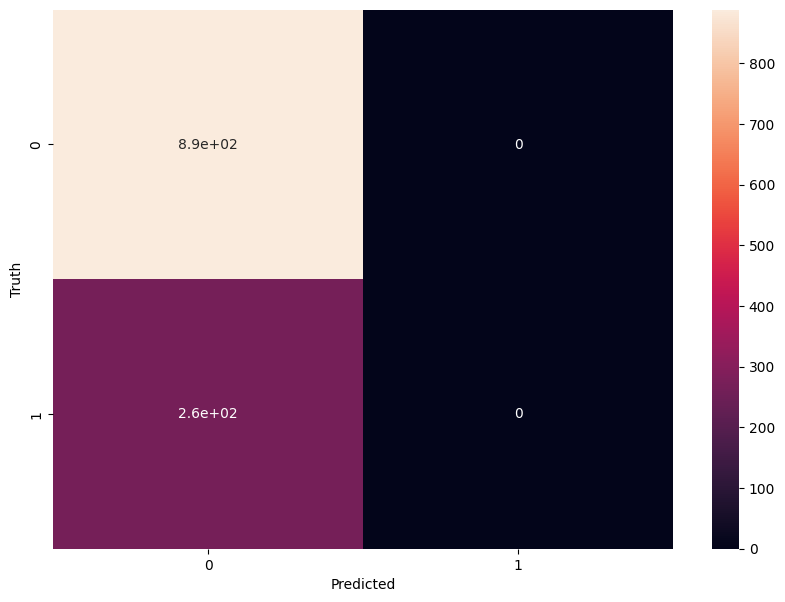

In [174]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error
cm = confusion_matrix(y_test,y_pred)
print(cm)

# confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

print(classification_report(y_test, y_pred))


In [175]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('mae => ', mae)
print('mse => ', mse)
print('rmse => ', rmse)

mae =>  0.22916666666666666
mse =>  0.22916666666666666
rmse =>  0.47871355387816905
